In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [111]:
!pip install wordcloud

     |████████████████████████████████| 160 kB 5.2 MB/s eta 0:00:01


In [112]:
from wordcloud import WordCloud

In [2]:
## Q0 Data Exploration
airbnb = pd.read_csv('./airbnb data/AB_NYC_2019.csv')
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
# can select which columns to remove if unnecessary 
# airbnb_subset = airbnb[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
#        'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
#        'minimum_nights', 'number_of_reviews', 'last_review',
#        'reviews_per_month', 'calculated_host_listings_count',
#        'availability_365']]

In [5]:
# List the counts of missing values for each column
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# List all the rows with name = NaN
airbnb[airbnb['name'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


In [7]:
# Summary of numerical values while dropping useless numerical values(id, host_id, etc.)
num_airbnb = airbnb.drop(['host_id', 'latitude', 'longitude'], axis=1)
num_airbnb.describe()

,id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
# Checking which row had the max price
max_price_row = airbnb.loc[airbnb['price'].idxmax()]
max_price_row

id                                                            7003697
name                              Furnished room in Astoria apartment
host_id                                                      20582832
host_name                                                    Kathrine
neighbourhood_group                                            Queens
neighbourhood                                                 Astoria
latitude                                                      40.7681
longitude                                                   -73.91651
room_type                                                Private room
price                                                           10000
minimum_nights                                                    100
number_of_reviews                                                   2
last_review                                                2016-02-13
reviews_per_month                                                0.04
calculated_host_list

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>],
       [<AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

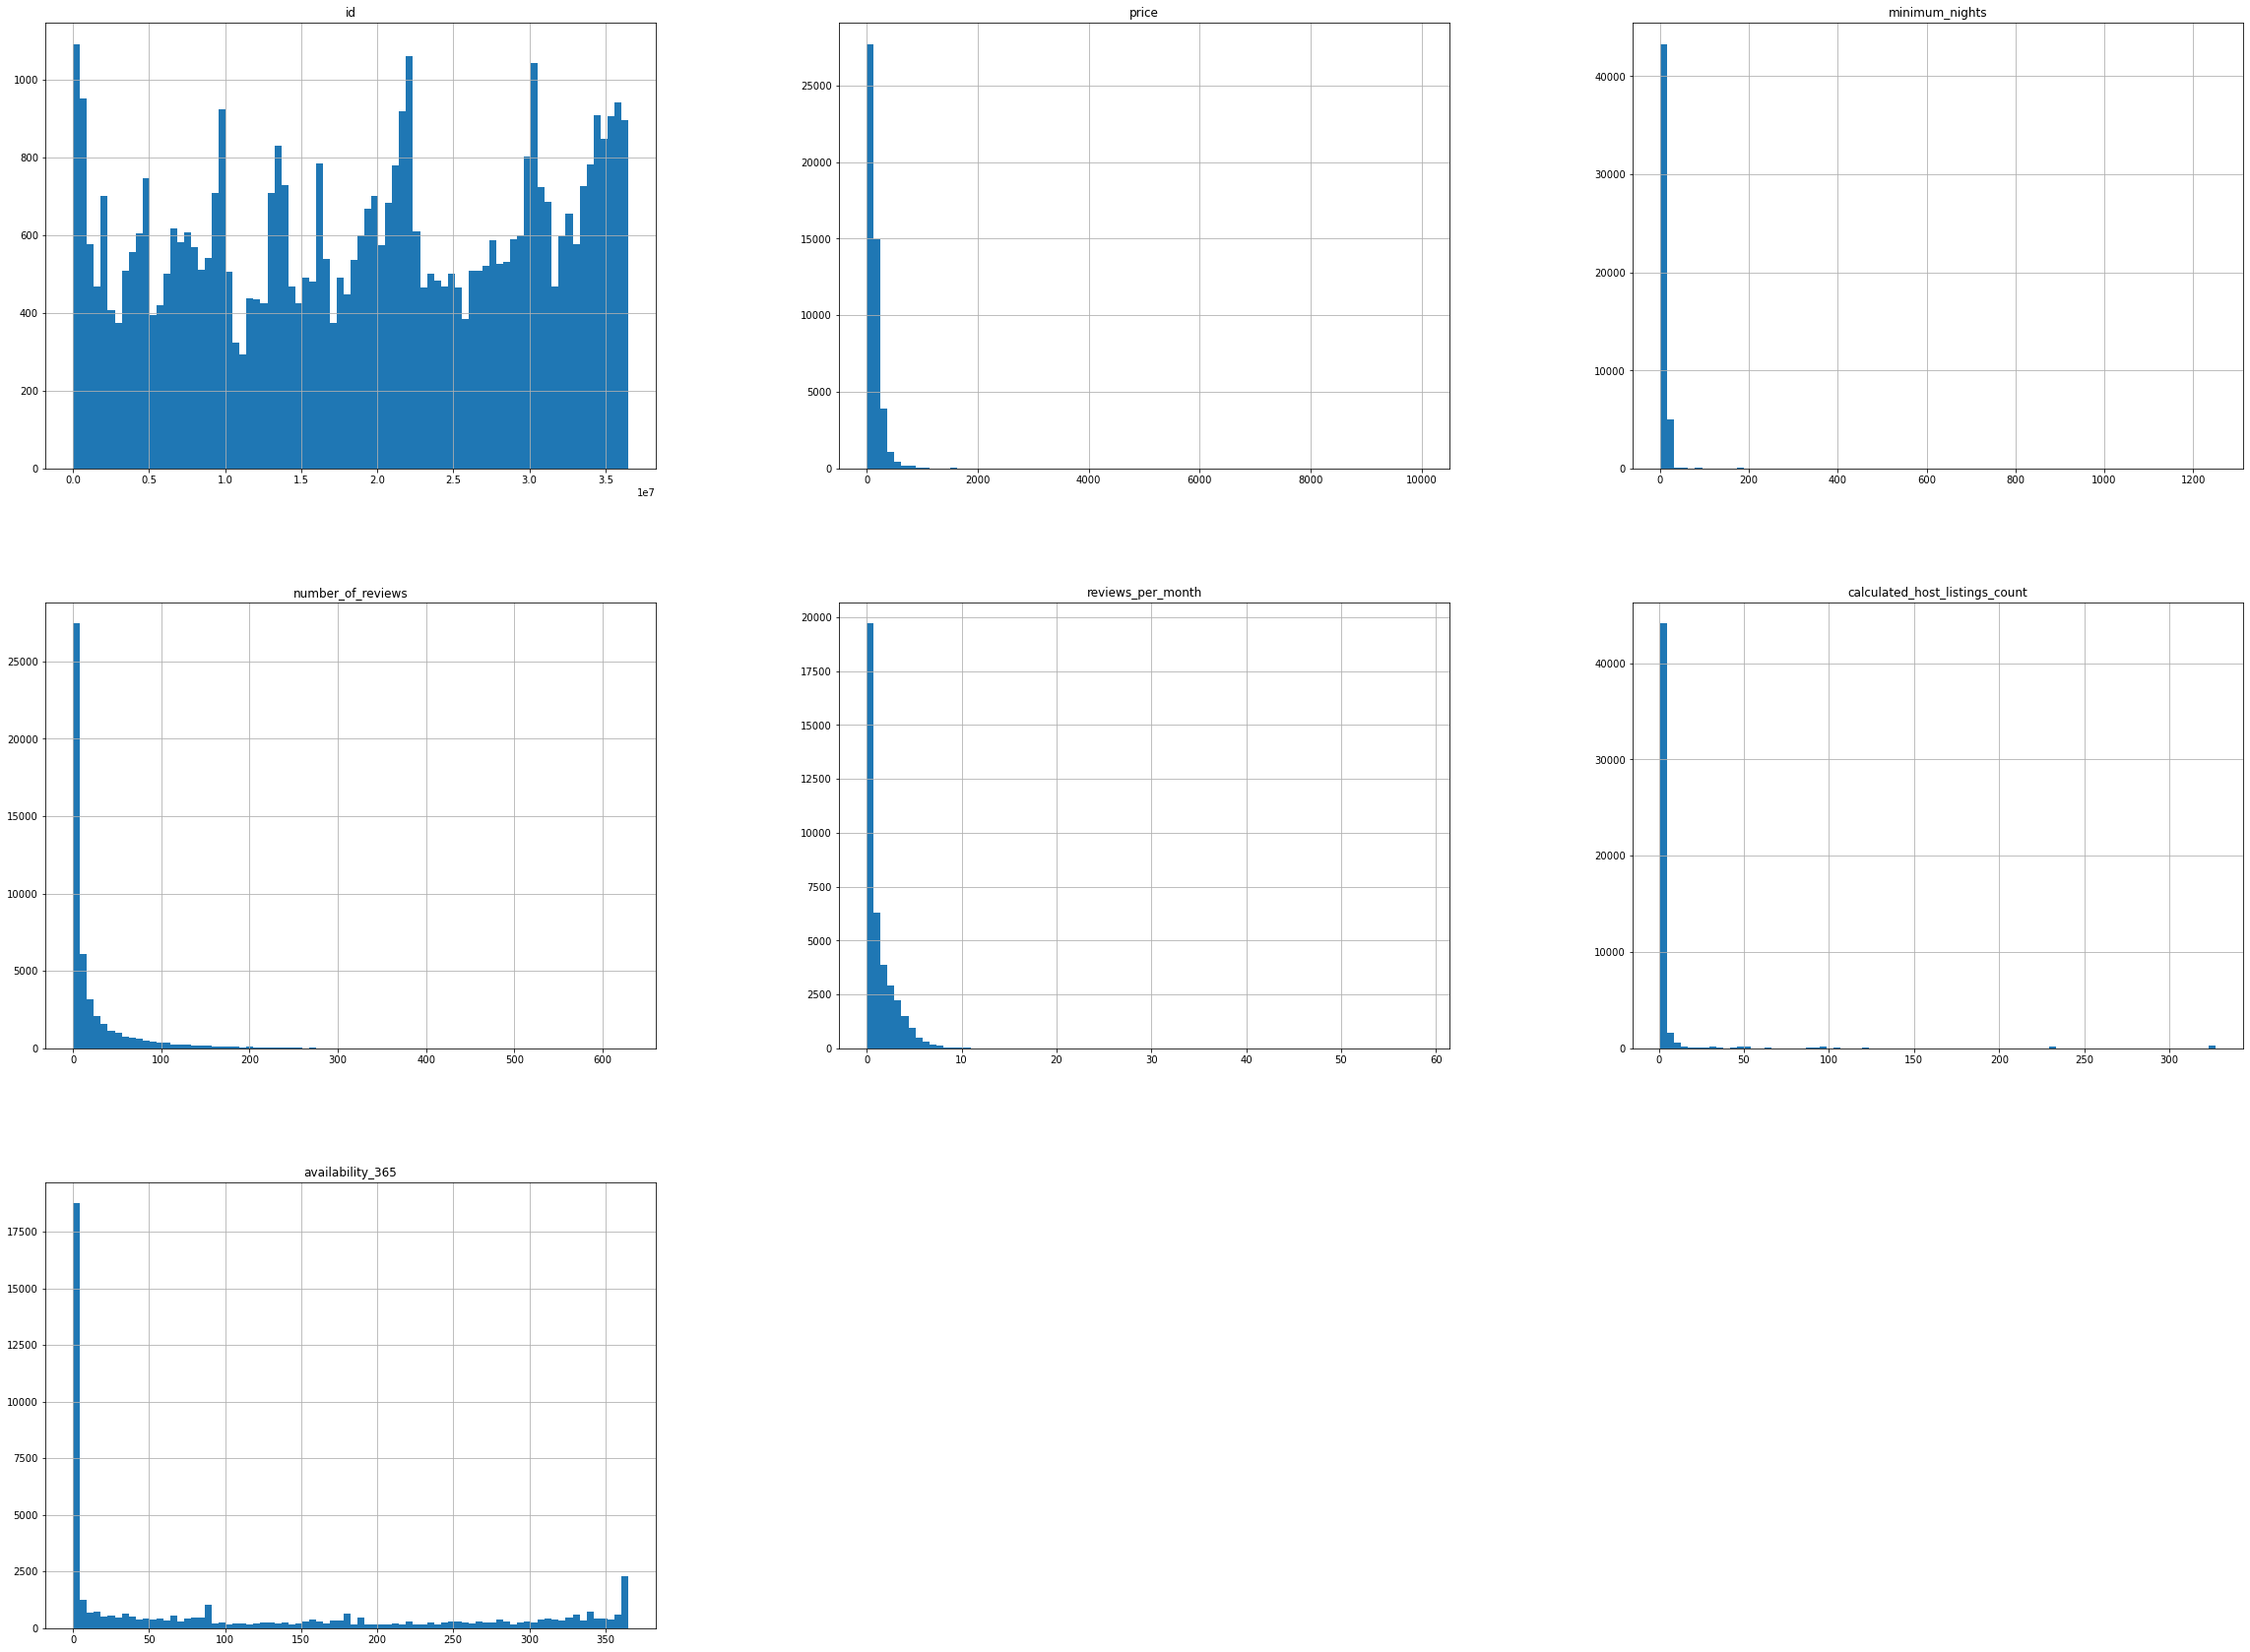

In [9]:
# Making a histogram of num_airbnb with the bin size and figure size
num_airbnb.hist(bins = 80, figsize=(40,30))

In [10]:
# Filtering out the rows of price where the price is greather than 2000
high_price = num_airbnb[num_airbnb['price'] > 2000]
high_price

,id,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
946,363673,Beautiful 3 bedroom in Manhattan,Tracey,Manhattan,Upper West Side,Private room,3000,7,0,NaN,NaN,1,365
1862,826690,"Sunny, Family-Friendly 2 Bedroom",Lucy,Brooklyn,Prospect Heights,Entire home/apt,4000,4,0,NaN,NaN,1,83
2018,893413,Architecturally Stunning Former Synagogue!,Martin,Manhattan,East Village,Entire home/apt,2500,30,15,2019-07-01,0.26,1,89
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,Jessica,Manhattan,Nolita,Entire home/apt,5000,1,2,2013-09-28,0.03,1,365
3537,2110145,UWS 1BR w/backyard + block from CP,Jay And Liz,Manhattan,Upper West Side,Entire home/apt,6000,14,17,2015-02-17,0.27,1,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45867,34981637,bay ridge & sunset park furnished apartment,Nony,Brooklyn,Bay Ridge,Entire home/apt,4200,60,0,NaN,NaN,1,90
46533,35297214,Amazing Chelsea 4BR Loft!,Viberlyn,Manhattan,Chelsea,Entire home/apt,2995,30,1,2019-06-24,1.00,1,214
46614,35345358,Northside Williamsburg Stunner,Alex,Brooklyn,Williamsburg,Entire home/apt,4500,30,0,NaN,NaN,1,365
48043,36056808,Luxury TriBeCa Apartment at an amazing price,Jenny,Manhattan,Tribeca,Entire home/apt,6500,180,0,NaN,NaN,1,365


<AxesSubplot:xlabel='id', ylabel='price'>

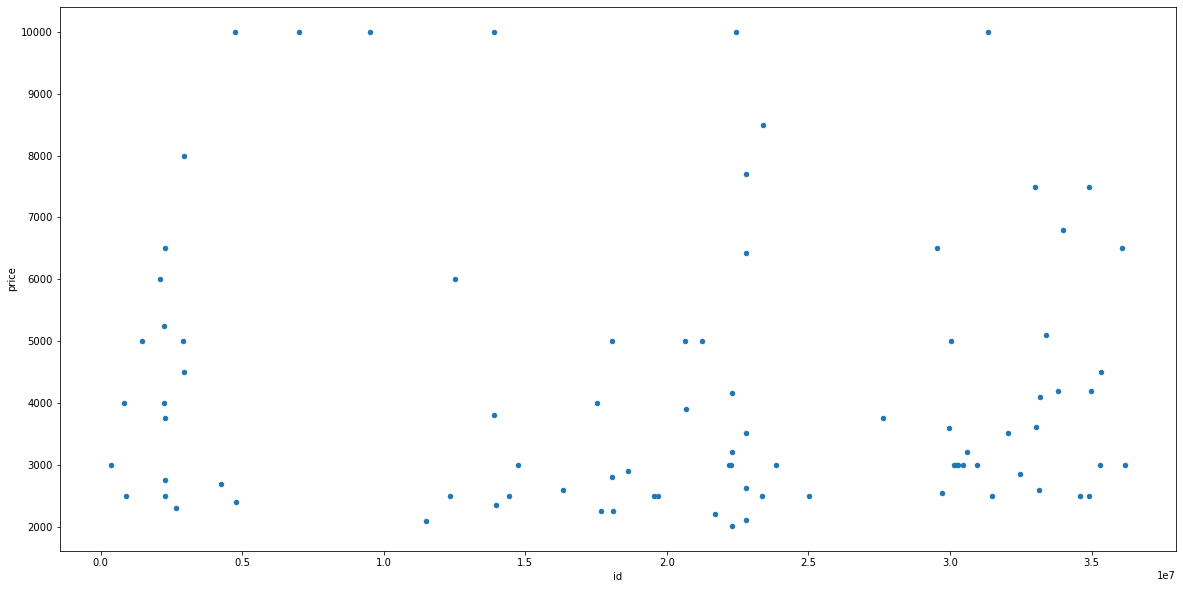

In [11]:
# Scatter plot of airbnb with high prices
high_price[['id', 'price']].plot(kind="scatter", x="id", y="price", figsize=(20,10))

<AxesSubplot:>

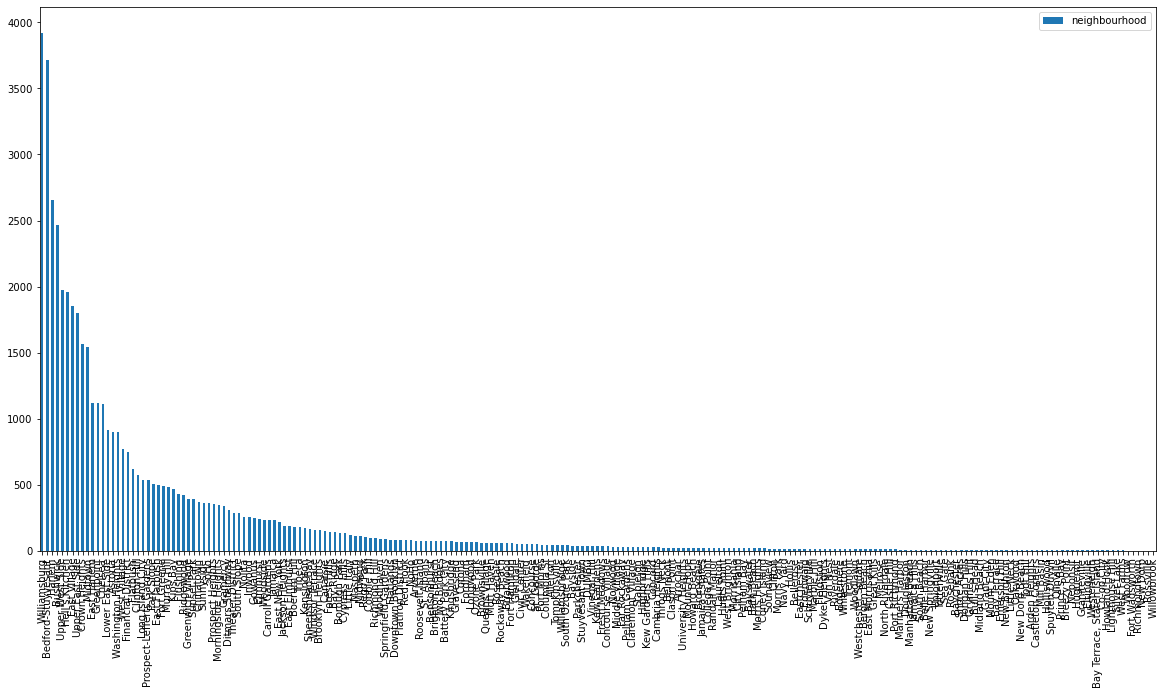

In [12]:
# Bar graph of count of neighbourhood names
pd.DataFrame(airbnb['neighbourhood'].value_counts()).plot(kind='bar', figsize=(20, 10))

In [13]:
# Count of cases where number of reviews = 0
(airbnb['number_of_reviews']==0).sum()

10052

In [14]:
# Count of each value in each column
for column_name in airbnb.columns:
    print("Value counts for column: ", column_name)
    print(airbnb[column_name].value_counts())
    print('\n')

Value counts for column:  id
2539        1
25583366    1
25551687    1
25552076    1
25554120    1
           ..
13121809    1
13122135    1
13122318    1
13122932    1
36487245    1
Name: id, Length: 48895, dtype: int64


Value counts for column:  name
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64


Value counts for column:  host_id
219517861    327
107434423    232
30283594 

In [15]:
# Q1 Data Cleaning
# Check for duplicates
airbnb.duplicated().sum()

0

In [16]:
# Check for the missing values
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [17]:
# Replace all missing values
airbnb['name'].fillna(airbnb['id'], inplace=True)
airbnb['host_name'].fillna(airbnb['host_id'], inplace=True)
airbnb['last_review'].fillna("Not Applicable", inplace=True)
airbnb['reviews_per_month'].fillna(0, inplace=True)

In [18]:
# Q2 Price vs Neighbourhood
# Filter airbnb so that it has only rows where neighbourhood is listed at least 6 times
airbnb['neighbourhood'].value_counts()
neighbourhood_airbnb = airbnb.groupby('neighbourhood').filter(lambda x: len(x) > 5)
neighbourhood_airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Not Applicable,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,Not Applicable,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,Not Applicable,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,Not Applicable,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,Not Applicable,0.00,6,2


In [29]:
# Part A
# The top 5 neighbourhoods with the highest prices
# Calculate the means of each neighbourhoods
neighbourhood_prices = neighbourhood_airbnb.groupby('neighbourhood')['price'].mean().reset_index()
neighbourhood_prices

,neighbourhood,price
0,Allerton,87.595238
1,Arrochar,115.000000
2,Arverne,171.779221
3,Astoria,117.187778
4,Bath Beach,81.764706
...,...,...
185,Williamsburg,143.802806
186,Windsor Terrace,138.993631
187,Woodhaven,67.170455
188,Woodlawn,60.090909


In [36]:
# Sort neighbourhood_prices
neighbourhood_prices_sorted = neighbourhood_prices.sort_values(by='price', ascending=False)
neighbourhood_prices_sorted

,neighbourhood,price
170,Tribeca,490.638418
150,Sea Gate,487.857143
144,Riverdale,442.090909
5,Battery Park City,367.557143
68,Flatiron District,341.925000
...,...,...
21,Bronxdale,57.105263
154,Soundview,53.466667
169,Tremont,51.545455
90,Hunts Point,50.500000


In [42]:
# Top 5 neighbourhoods with highest prices
neighbourhood_prices_sorted.head(5)

,neighbourhood,price
170,Tribeca,490.638418
150,Sea Gate,487.857143
144,Riverdale,442.090909
5,Battery Park City,367.557143
68,Flatiron District,341.925000


In [45]:
# Bottom 5 neighbourhoods with the lowest prices
neighbourhood_prices_sorted.tail(5)

,neighbourhood,price
21,Bronxdale,57.105263
154,Soundview,53.466667
169,Tremont,51.545455
90,Hunts Point,50.500000
24,Bull's Head,47.333333


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

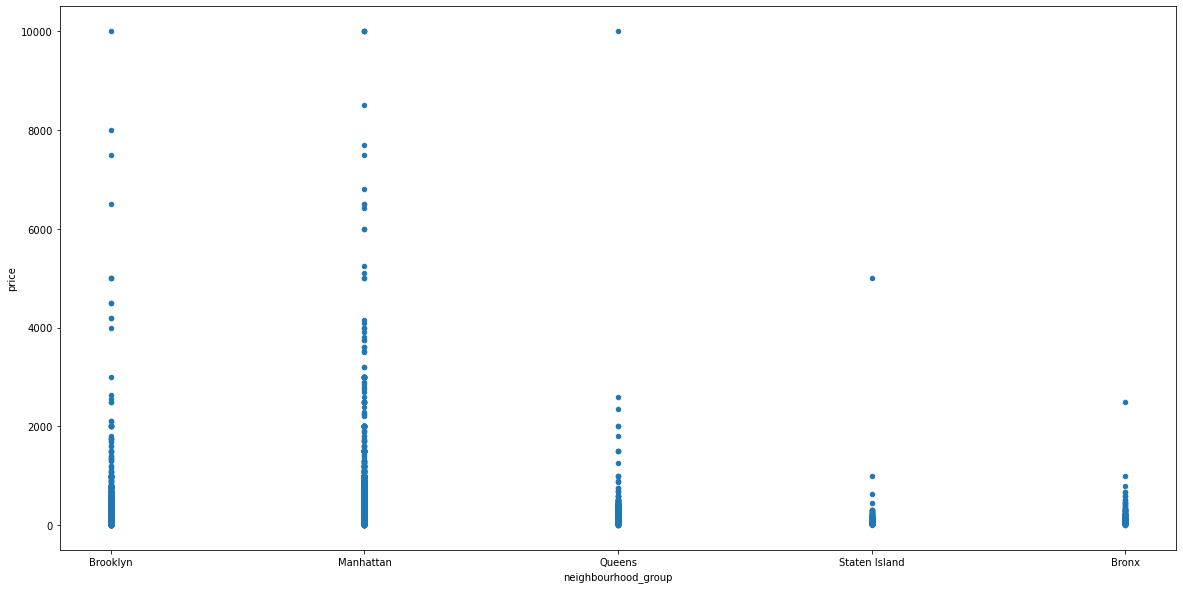

In [46]:
# Part B
# Scatter Plot of price vs neighbourhood group
neighbourhood_airbnb[['neighbourhood_group', 'price']].plot(kind="scatter", x="neighbourhood_group", y="price", figsize=(20,10))

In [51]:
# Analysis
neighbourhood_airbnb['neighbourhood_group'].value_counts()
# Generally, the more populated the neighbourhood group was, the more expensive it was. 

Manhattan        21661
Brooklyn         20100
Queens            5651
Bronx             1079
Staten Island      312
Name: neighbourhood_group, dtype: int64

In [118]:
# Q3
# I wanted to look at the correlation between the attributes  price, minimum_nights, 
# calculated_host_listings_count, number_of_reviews, and  avability_365.
# Select features for Pearson correlation
pearson_airbnb = airbnb[['price', 'availability_365', 'minimum_nights', 'calculated_host_listings_count', 'number_of_reviews']]
pearson_airbnb

,price,availability_365,minimum_nights,calculated_host_listings_count,number_of_reviews
0,149,365,1,6,9
1,225,355,1,2,45
2,150,365,3,1,0
3,89,194,1,1,270
4,80,0,10,1,9
...,...,...,...,...,...
48890,70,9,2,2,0
48891,40,36,4,2,0
48892,115,27,10,1,0
48893,55,2,1,6,0


In [119]:
# Pairwise pearson correlations
correlations = pearson_airbnb.corr()
correlations

,price,availability_365,minimum_nights,calculated_host_listings_count,number_of_reviews
price,1.000000,0.081829,0.042799,0.057472,-0.047954
availability_365,0.081829,1.000000,0.144303,0.225701,0.172028
minimum_nights,0.042799,0.144303,1.000000,0.127960,-0.080116
calculated_host_listings_count,0.057472,0.225701,0.127960,1.000000,-0.072376
number_of_reviews,-0.047954,0.172028,-0.080116,-0.072376,1.000000


<AxesSubplot:>

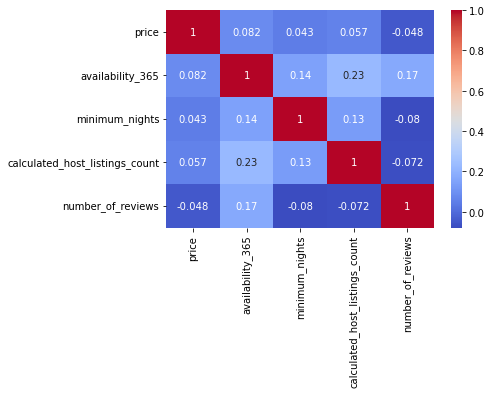

In [178]:
# Heatmap of correlations
sns.heatmap(correlations, annot=True, cmap='coolwarm')

In [66]:
# Most positive correlation: calculated_host_listings count and availability_365 with a value of 0.23
# Most negative correlation: minimum_nights and number_of_reviews with a value of -0.08

In [90]:
# Q4
# Part A
locations_airbnb = airbnb[['latitude', 'longitude', 'neighbourhood_group']]
locations_airbnb.loc[:,'neighbourhood_group'] = locations_airbnb['neighbourhood_group'].astype('category')

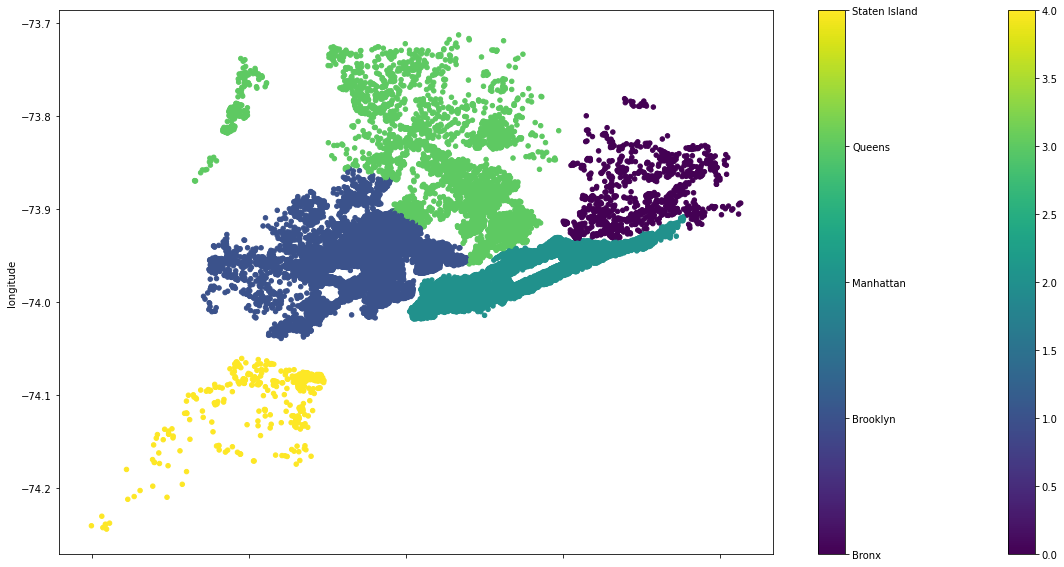

In [93]:
# create a dictionary mapping codes to neighborhood names
neighborhoods = dict(enumerate(locations_airbnb['neighbourhood_group'].cat.categories))

# create the scatter plot with color-coded points
ax = locations_airbnb.plot(kind='scatter', x='latitude', y='longitude', figsize=(20, 10), c=locations_airbnb['neighbourhood_group'].cat.codes, colormap='viridis')

# add a color key legend to the plot
colorbar = plt.colorbar(ax.collections[0])
colorbar.set_ticks(range(len(neighborhoods)))
colorbar.set_ticklabels([neighborhoods[key] for key in neighborhoods.keys()])


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

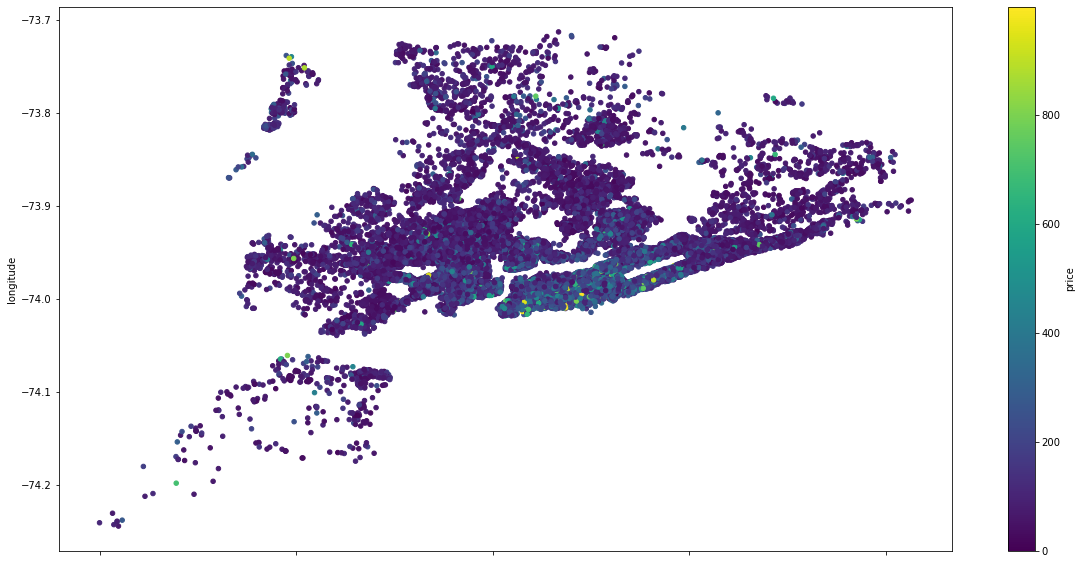

In [106]:
# Part B
# Scatter plot with price as color-code
airbnb_location_price = airbnb.loc[airbnb['price'] < 1000, ['latitude', 'longitude', 'price']]

airbnb_location_price.plot(kind="scatter", x='latitude', y='longitude', c='price', figsize=(20, 10), colormap='viridis')

In [107]:
# We can see the colors of green and dark blue which are more expensive than the majority of colors, (purple)
# are most prevalent in the Manhattan, Brooklyn, and Queens area. The ones with yellow colors are mostly seen
# in the Manhattan area.

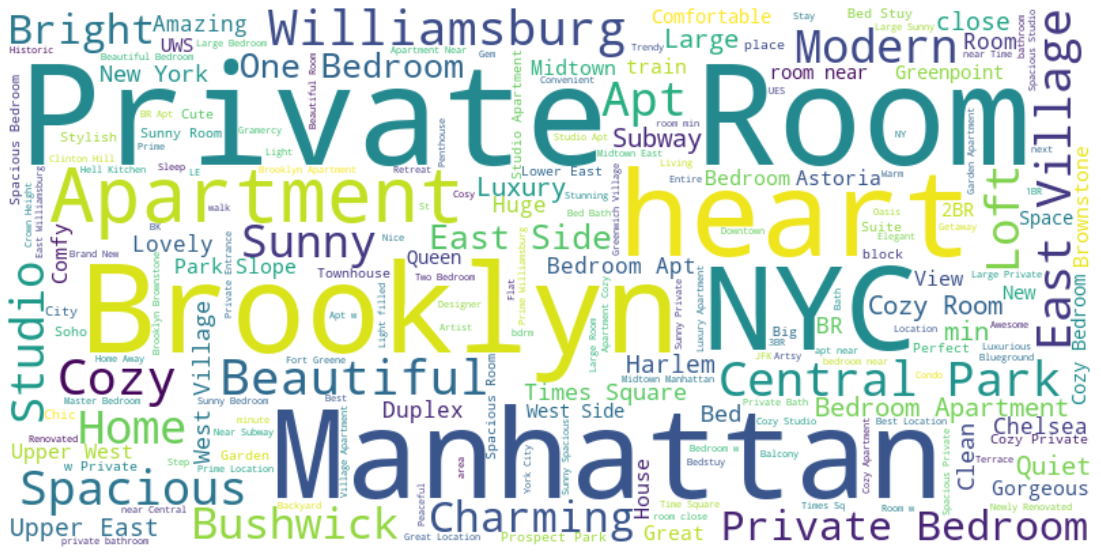

In [114]:
# Q5
# Extract the names of the listings
names = airbnb['name'].astype(str)

# Combine all the names into a single string
all_names = ' '.join(names)

# Generate the word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(all_names)

# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

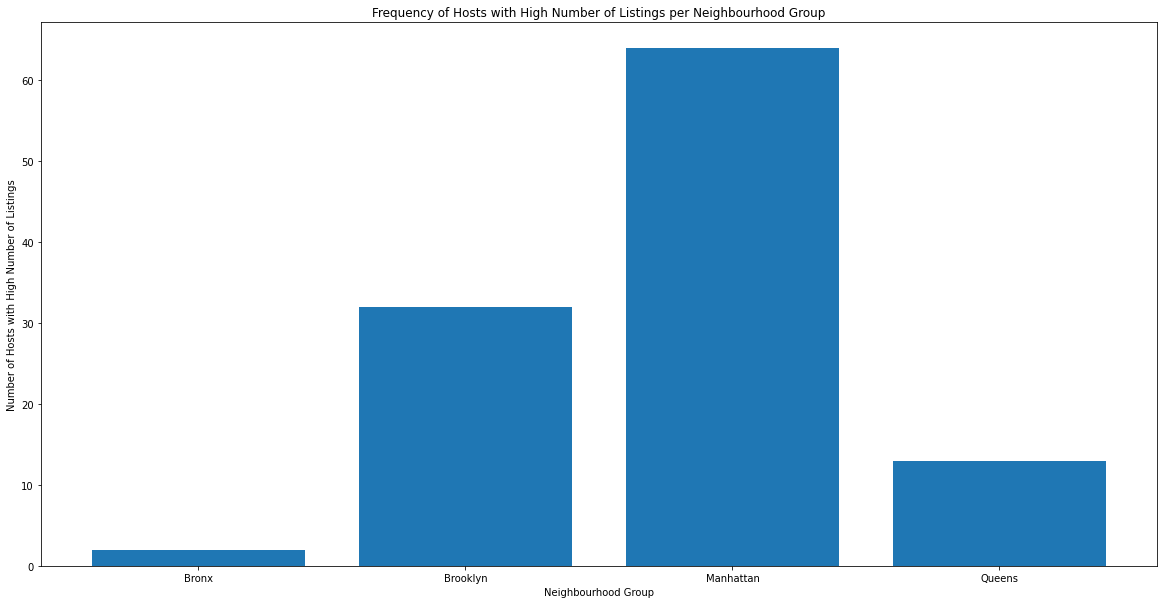

In [174]:
# Q6
# Identify "high" host listing counts
host_counts = airbnb[airbnb['calculated_host_listings_count'] > 10]

# Group the data by neighbourhood group and count the number of unique host IDs
grouped = host_counts.groupby('neighbourhood_group')['host_id'].nunique()

# Plot the results
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(grouped.index, grouped.values)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Number of Hosts with High Number of Listings')
ax.set_title('Frequency of Hosts with High Number of Listings per Neighbourhood Group')
plt.show()

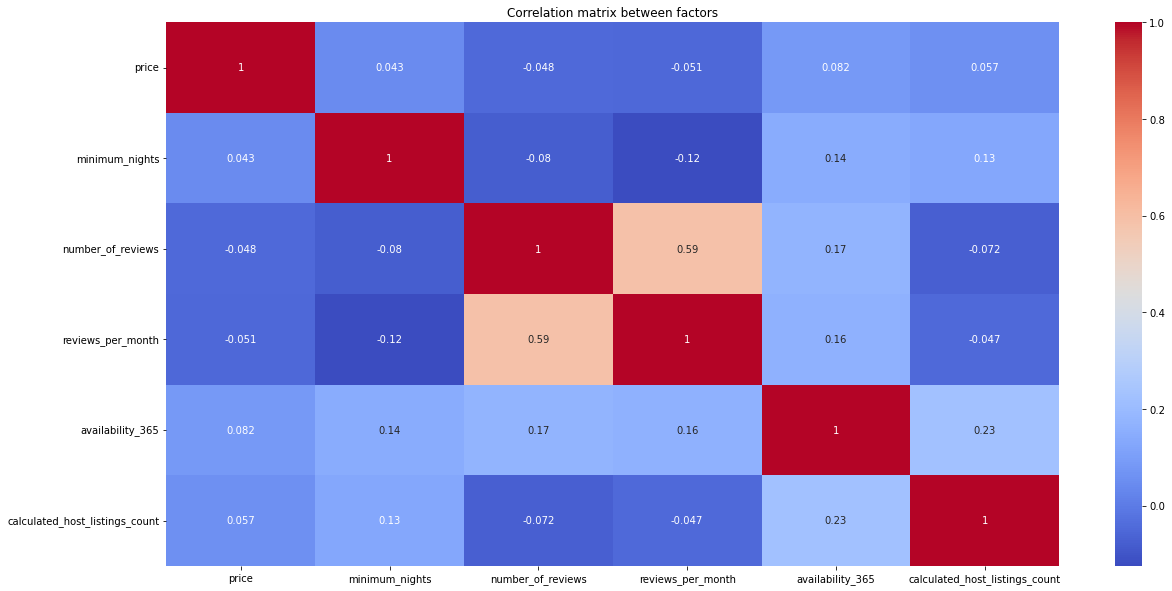

In [177]:
# Calculate the correlation between the number of listings and other factors such as availability and price
corr_matrix = airbnb[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'calculated_host_listings_count']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix between factors')
plt.show()

In [179]:
# Although it isn't a significant correlation, we can see based on the Pearson correlation that 
# the more available the room was, the more host_listings_count it had. 

In [190]:
# Q7
# Plot 1: I will plot number of reviews per unique id vs calculated host listing count


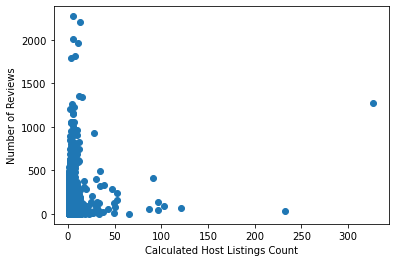

In [189]:
# group the data by host_id and calculate the number of reviews per host
reviews_per_host = airbnb.groupby('host_id')['number_of_reviews'].sum()

# group the data by host_id and calculate the calculated_host_listings_count per host
listings_per_host = airbnb.groupby('host_id')['calculated_host_listings_count'].max()

# plot a scatter plot of listings per host versus reviews per host
plt.scatter(listings_per_host, reviews_per_host)
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Number of Reviews')
plt.show()

# This plot an attempt to show something I believed would be true: that if a host has high number of listings, 
# they would also have high number of reviews. However, it was the opposite. A lot of low listing counts had
# high number of reviews.

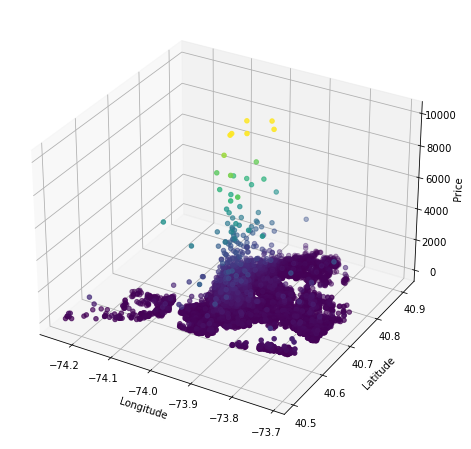

In [193]:
# Plot 2: I will plot a 3d scatter plot of the location of each listings and the price
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = airbnb['longitude']
y = airbnb['latitude']
z = airbnb['price']

ax.scatter(x, y, z, c=z, cmap='viridis')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Price')

plt.show()

# This plot shows a better visualization of part B of Q4. It shows visually  which areas 
# are more expensive and I believe it has more clarity since the previous one had too much
# overlap in colors. 